In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Logo-generating module
import anylogo
from character import get_fonts, get_default_font

%matplotlib inline
plt.ion()

Failed on /Library/Fonts/NISC18030.ttf


/Users/jkinney/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [2]:
def load_fasta(file_name, mat_type='counts_mat'):

    # Read in sequences from FASTA file
    df = pd.io.parsers.read_csv(file_name,comment='>',names=['seq'])

    # Get sequence length
    L = len(df.loc[0,'seq'])

    # Remove whitespace
    for i in range(len(df)):
        seq = df.loc[i,'seq'].strip()
        assert len(seq)==L
        df.loc[i,'seq'] = seq

    # Get set of unique characters
    seq_list = list(df['seq'])
    seq_concat = ''.join(seq_list)
    unique_chars = list(set(seq_concat))
    unique_chars.sort()

    # Create counts matrix
    counts_mat = pd.DataFrame(index=range(L), columns=unique_chars).fillna(0)

    # Create array of characters at each position
    char_array = np.array([np.array(list(seq)) for seq in seq_list])

    # Sum of the number of occurances of each character at each position
    for c in unique_chars:
        counts_mat.loc[:,c] = (char_array==c).sum(axis=0).ravel()
        
    # Name index
    counts_mat.index.name = 'pos'

    return counts_mat

In [3]:
# Load counts matrix from fasta file
counts_mat = load_fasta('crp_sites.fasta')
counts_mat.to_csv('crp_counts_mat.txt', sep='\t', float_format='%d')

# Convert to frequency matrix
def counts_mat_to_freq_mat(counts_mat):
    freq_mat = counts_mat.copy()
    pseudocount = 1
    tmp_mat = counts_mat + pseudocount
    freq_mat.loc[:,:] = tmp_mat.values/tmp_mat.values.sum(axis=1)[:,np.newaxis]
    return freq_mat

freq_mat = counts_mat_to_freq_mat(counts_mat)
freq_mat.head()
freq_mat.to_csv('crp_freq_mat.txt', sep='\t', float_format='%0.2f')

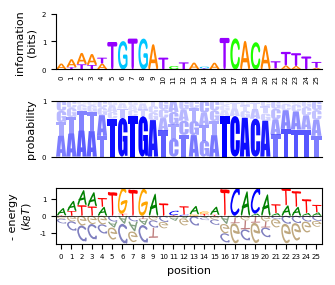

In [6]:
fig = plt.figure(figsize=[3.3,2.8])

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = .5
mpl.rcParams['font.size'] = 5
mpl.rcParams['axes.labelsize'] = 8

# Plot information logo
ax = fig.add_subplot(3,1,1)
anylogo.Logo(mat=freq_mat, mat_type='freq_mat', font_name='Arial Rounded MT Bold',
             logo_type='info_logo', color_scheme='gist_rainbow').draw()
#plt.title('information logo', fontsize=8)

# Plot frequency logo
ax = fig.add_subplot(3,1,2)
anylogo.Logo(mat=freq_mat, mat_type='freq_mat', font_name='Impact',
             logo_type='freq_logo', color_scheme='blue', logo_style='rails', 
             stack_order='small_on_top', use_transparency=True).draw()
#plt.title('probability logo', fontsize=8)

# Plot energy logo
ax = fig.add_subplot(3,1,3)
anylogo.Logo(mat=freq_mat, mat_type='freq_mat', 
             logo_type='energy_logo', neg_flip=True, 
             logo_style='everything', font_name='Comic Sans MS', 
             color_scheme='classic').draw()
#plt.title('energy logo', fontsize=8)

fig.tight_layout(h_pad=2)
fig.savefig('logos.pdf')

In [5]:
from matplotlib.colors import to_rgb
to_rgb('blacks')

ValueError: Invalid RGBA argument: 'blacks'